# 📑 Table of Contents

1. [Introduction](#Introduction)
2. [Data Preprocessing](#Data-Preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
4. [Cluster Analysis](#Cluster-Analysis)
5. [Correlation Analysis](#Correlation-Analysis)
6. [Predictive Modeling](#Predictive-Modeling)
    - [Model Evaluation](#Model-Evaluation)
7. [Conclusion](#Conclusion)

# 🔍 Introduction

In this notebook, we perform an in-depth analysis of health and sleep data to uncover patterns, correlations, and predictive models. This analysis includes clustering, correlation analysis, and predictive modeling.

# 🧹 Data Preprocessing <a id='Data-Preprocessing'></a>

Data preprocessing is a critical step that involves cleaning, transforming, and preparing data for analysis. This section includes handling missing values, converting categorical variables to numeric, and normalizing data.

# 📊 Exploratory Data Analysis (EDA) <a id='Exploratory-Data-Analysis'></a>

Exploratory Data Analysis helps to summarize the main characteristics of the dataset, often visualizing the data for better understanding.

# 📈 Cluster Analysis <a id='Cluster-Analysis'></a>

Cluster Analysis involves grouping individuals based on their health and sleep patterns. We'll use K-Means clustering to identify distinct groups in the dataset.

# 🧮 Data Transformation

Before running the clustering algorithm, it is essential to transform the time-based features (e.g., 'Bedtime', 'Wake-up Time') into a numerical format. This transformation allows the machine learning model to process the data effectively.

> **📝 Note:** When transforming time features, ensure that the time format is consistent across the dataset. This step is crucial to avoid any errors during data conversion.

> **💡 Tip:** You can customize the clustering analysis by experimenting with different distance metrics, such as Euclidean or Manhattan distance.

### 📐 Distance Calculation Formula

The Euclidean distance between two points \(A(x_1, y_1)\) and \(B(x_2, y_2)\) is given by:

\[
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\]

This formula is essential for calculating distances in K-Means clustering.

<details>
<summary><b>🔍 Click to Expand: Data Preprocessing Details</b></summary>

- **Step 1:** Handle missing values by filling or dropping them.
- **Step 2:** Encode categorical variables using one-hot encoding or label encoding.
- **Step 3:** Normalize or standardize numerical features to ensure uniformity in scale.

</details>

---

> **⚠️ Important:** Ensure that all transformations are applied consistently across both training and testing datasets to avoid data leakage.

---



# 🚀 Conclusion

This notebook demonstrates a comprehensive approach to analyzing health and sleep data using clustering, correlation analysis, and predictive modeling. Feel free to experiment with different models, parameters, and visualizations to uncover more insights!

**What's Next?** Share your findings, discuss with peers, and contribute to improving this analysis!

# Cluster Analysis, Correlation Analysis, and Predictive Modeling

This section adds advanced analysis to the health and sleep dataset, including clustering, correlation analysis, and predictive modeling.

## 1. Cluster Analysis

### Step 1: Data Preprocessing for Clustering

We need to preprocess the data to convert categorical variables to numeric and standardize numerical features.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data_path = '/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv'
health_sleep_data = pd.read_csv(data_path)

In [3]:
# Convert categorical variables to numerical representations
health_sleep_data_encoded = health_sleep_data.copy()
health_sleep_data_encoded['Gender'] = health_sleep_data_encoded['Gender'].map({'m': 1, 'f': 0})
activity_mapping = {'low': 0, 'medium': 1, 'high': 2}
health_sleep_data_encoded['Physical Activity Level'] = health_sleep_data_encoded['Physical Activity Level'].map(activity_mapping)
diet_mapping = {'unhealthy': 0, 'medium': 1, 'healthy': 2}
health_sleep_data_encoded['Dietary Habits'] = health_sleep_data_encoded['Dietary Habits'].map(diet_mapping)
binary_mapping = {'yes': 1, 'no': 0}
health_sleep_data_encoded['Sleep Disorders'] = health_sleep_data_encoded['Sleep Disorders'].map(binary_mapping)
health_sleep_data_encoded['Medication Usage'] = health_sleep_data_encoded['Medication Usage'].map(binary_mapping)

In [4]:
# Standardize numerical features for clustering
scaler = StandardScaler()
numerical_features = ['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']
health_sleep_data_encoded[numerical_features] = scaler.fit_transform(health_sleep_data_encoded[numerical_features])

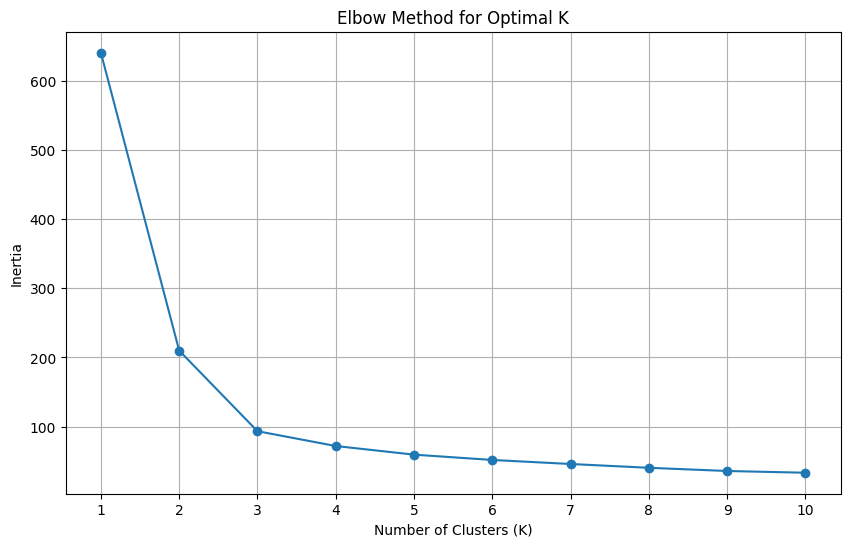

In [12]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

# Features to use for clustering (excluding 'User ID', 'Bedtime', and 'Wake-up Time')
clustering_features = health_sleep_data_encoded.drop(['User ID', 'Bedtime', 'Wake-up Time'], axis=1)

for k in cluster_range:
    # Explicitly set the `n_init` parameter to suppress the warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Apply K-Means clustering with K = 3, with explicit `n_init` to suppress the warning
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
health_sleep_data_encoded['Cluster'] = kmeans.fit_predict(clustering_features)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

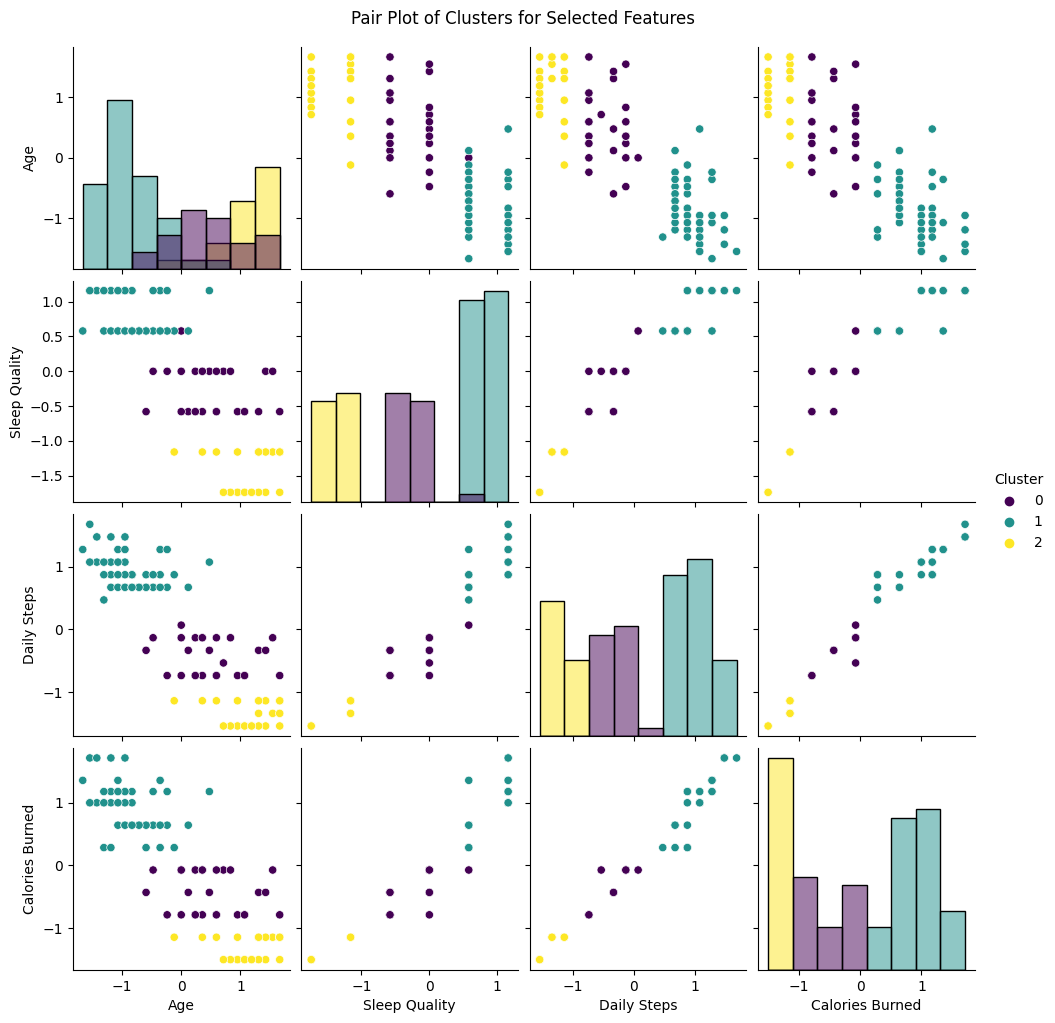

In [14]:
# Ensure that any inf values in the data are converted to NaN
health_sleep_data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, fill or drop NaN values depending on the context of your analysis
health_sleep_data_encoded.dropna(inplace=True)  # Drop rows with NaN values

# Apply K-Means clustering with K = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
health_sleep_data_encoded['Cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters using a pair plot for selected features
sns.pairplot(health_sleep_data_encoded, vars=['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned'], hue='Cluster', palette='viridis', diag_kind='hist')
plt.suptitle('Pair Plot of Clusters for Selected Features', y=1.02)
plt.show()


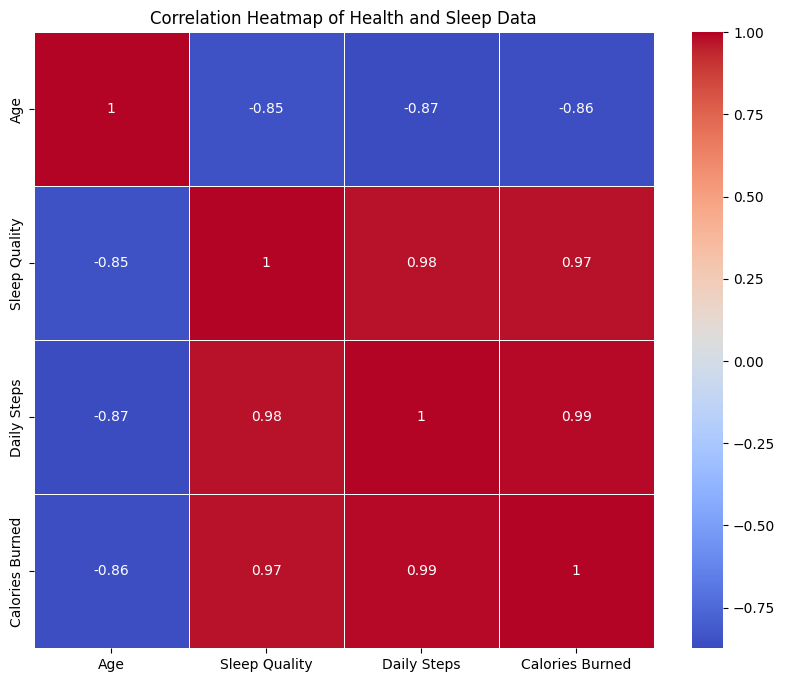

In [7]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = health_sleep_data_encoded[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Health and Sleep Data')
plt.show()


In [10]:
# Convert 'Bedtime' and 'Wake-up Time' to minutes since midnight for numerical processing
def time_to_minutes(time_str):
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

# Apply the conversion
health_sleep_data_encoded['Bedtime'] = health_sleep_data_encoded['Bedtime'].apply(time_to_minutes)
health_sleep_data_encoded['Wake-up Time'] = health_sleep_data_encoded['Wake-up Time'].apply(time_to_minutes)

# Prepare the data for predictive modeling
# Define target variable and features
target = 'Sleep Quality'
features = health_sleep_data_encoded.drop(['Sleep Quality', 'Cluster'], axis=1)  # Exclude target and 'Cluster'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, health_sleep_data_encoded[target], test_size=0.2, random_state=42)

In [11]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

# Train models and evaluate their performance
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared value
    model_performance[model_name] = {'MSE': mse, 'R^2': r2}

# Display model performance
model_performance_df = pd.DataFrame(model_performance).T
model_performance_df


,MSE,R^2
Linear Regression,0.083586,0.920863
Random Forest,0.027842,0.973639
XGBoost,0.034039,0.967773
